<a href="https://colab.research.google.com/github/AbdelrahmanFeteha/ML-for-Thyroid-Cancer-Disagnosis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset link:
https://www.kaggle.com/datasets/bhargavchirumamilla/thyroid-cancer-risk-dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay, roc_curve,
                            roc_auc_score, classification_report, log_loss)



In [ ]:
df = pd.read_csv("thyroid_cancer_risk_data.csv")
df.head()

Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1      1.73     10.54         4.05                 Low    Benign  
2      2.59     10.57         4.61                 Low    Benign  
3      2.62     11.04         2.46              Medium    Benign  
4      2.11     10.71         2.11                High    Benign

In [ ]:
df["Diagnosis"].unique()

array(['Benign', 'Malignant'], dtype=object)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Th

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [ ]:
# Display column names
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


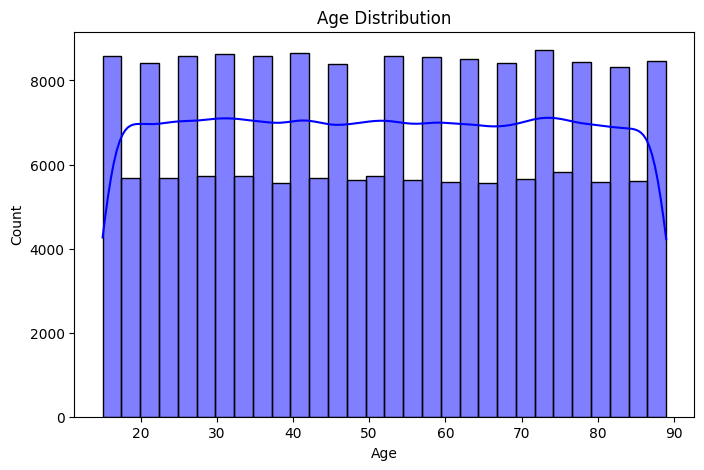

In [ ]:

#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


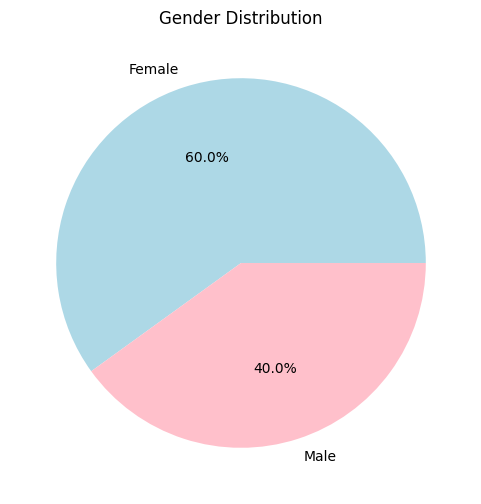

In [ ]:
# Gender Distribution
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

<ipython-input-13-39b40a80baae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Thyroid_Cancer_Risk", data=df, palette="Set2")


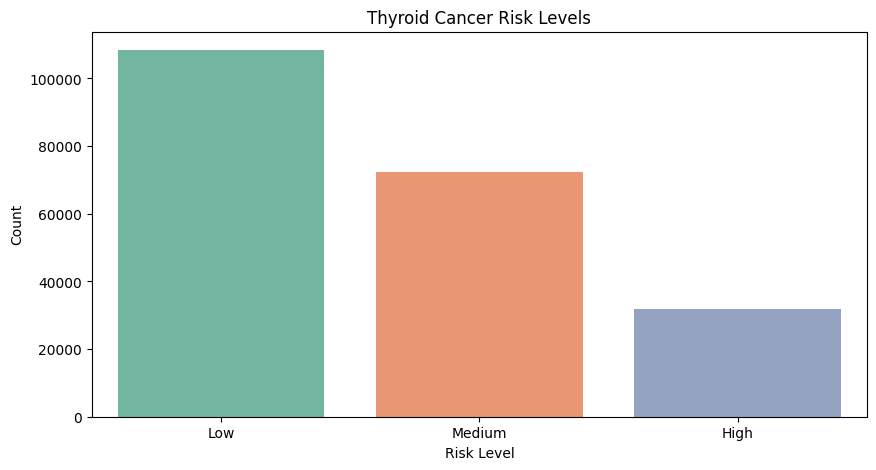

In [ ]:
#Thyroid Cancer Risk Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="Thyroid_Cancer_Risk", data=df, palette="Set2")
plt.title("Thyroid Cancer Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

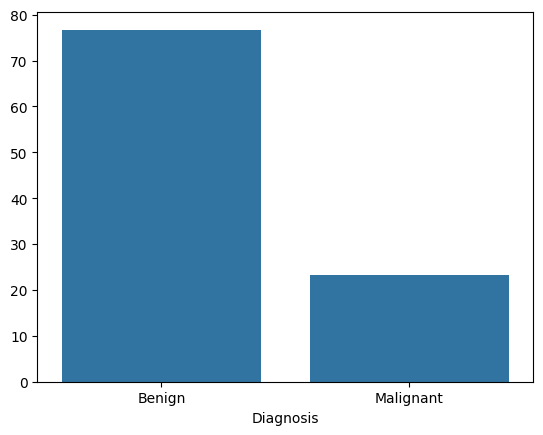

In [ ]:
# checking imbalance
diag= df['Diagnosis'].value_counts(normalize = True)

sns.barplot(x=diag.index, y=diag.values*100)

plt.show()

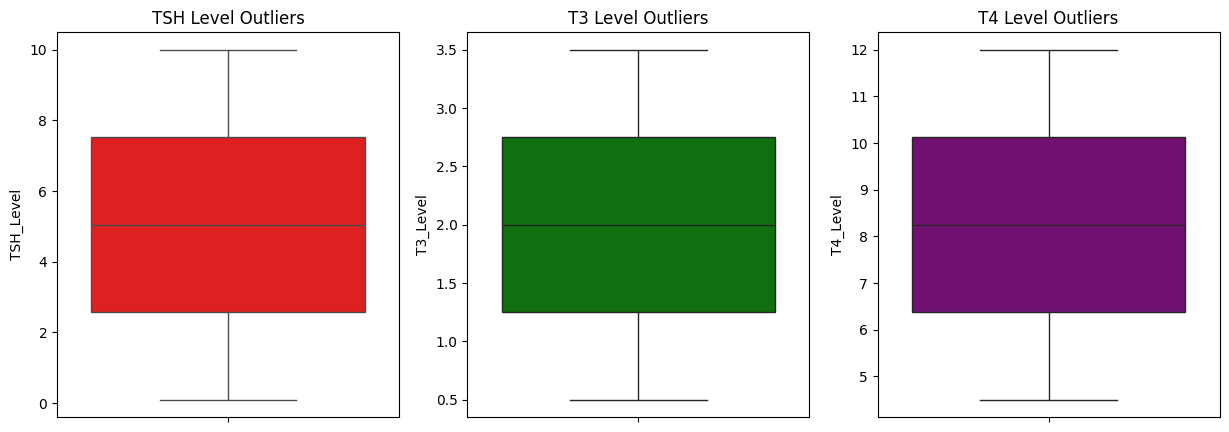

In [ ]:
# Boxplot to detect outliers in TSH, T3, T4 Levels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df["TSH_Level"], ax=axes[0], color="red").set_title("TSH Level Outliers")
sns.boxplot(y=df["T3_Level"], ax=axes[1], color="green").set_title("T3 Level Outliers")
sns.boxplot(y=df["T4_Level"], ax=axes[2], color="purple").set_title("T4 Level Outliers")
plt.show()

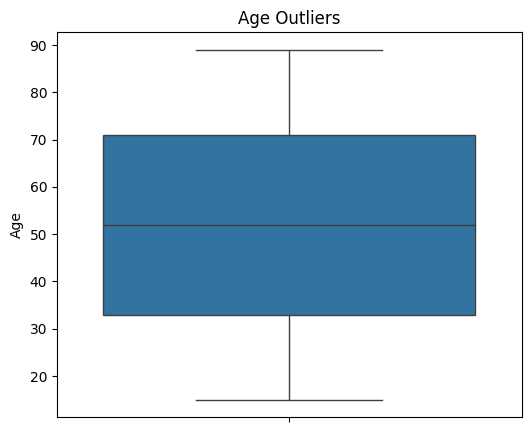

In [ ]:
#boxplot for age
plt.figure(figsize=(6,5))
sns.boxplot(y=df["Age"])
plt.title("Age Outliers")
plt.ylabel("Age")
plt.show()

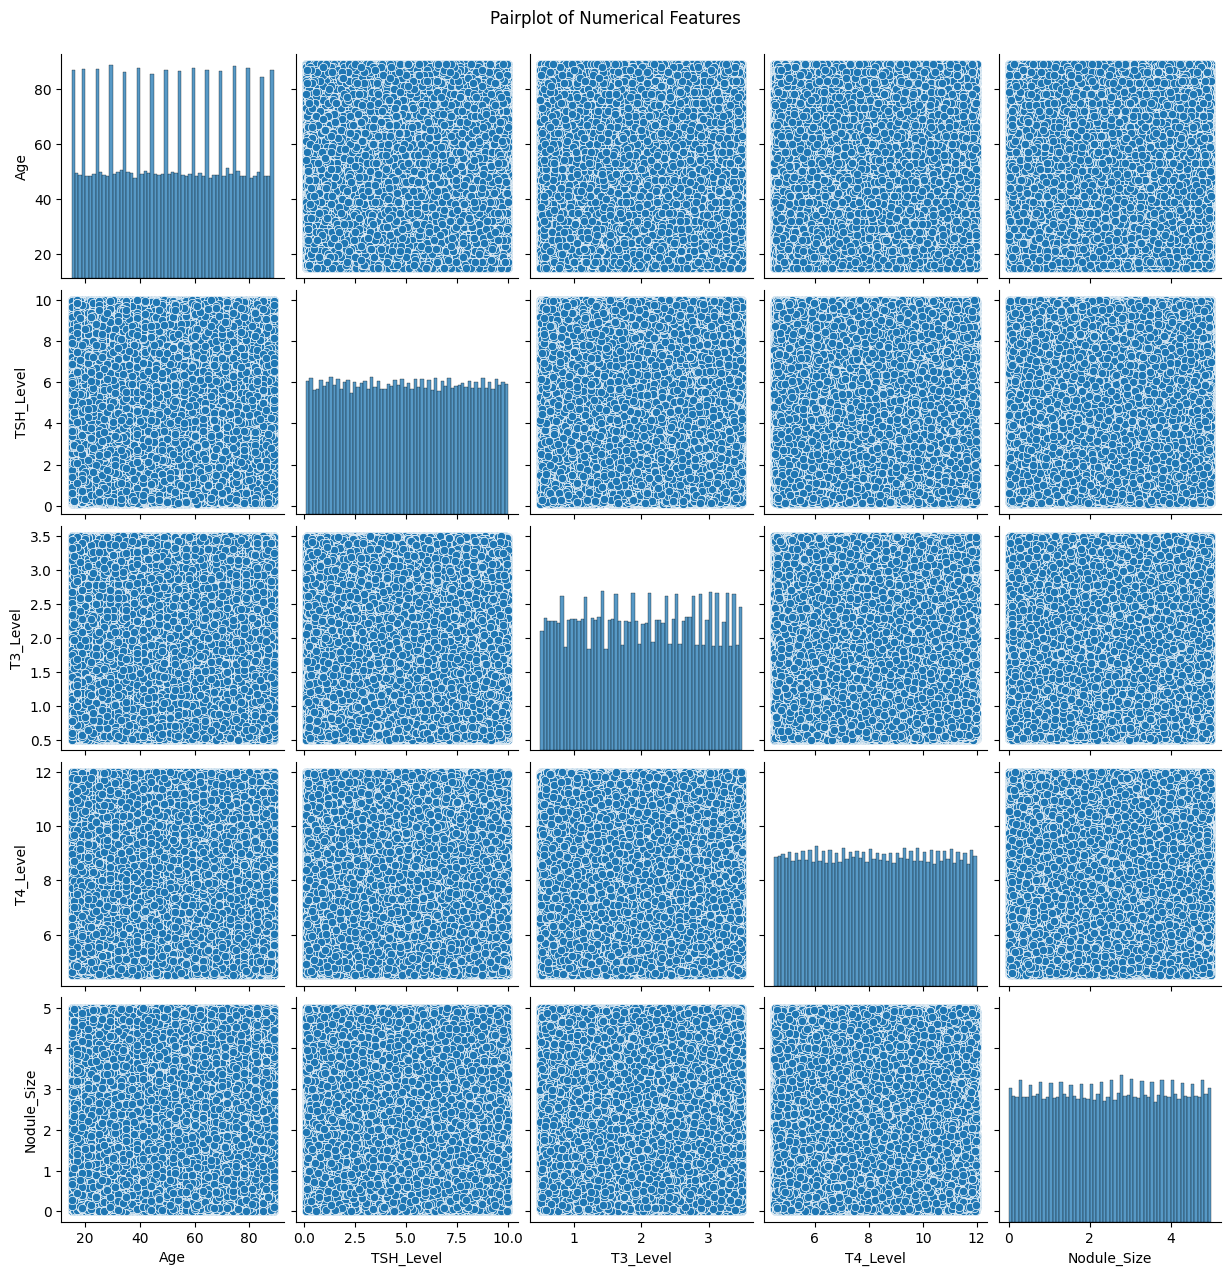

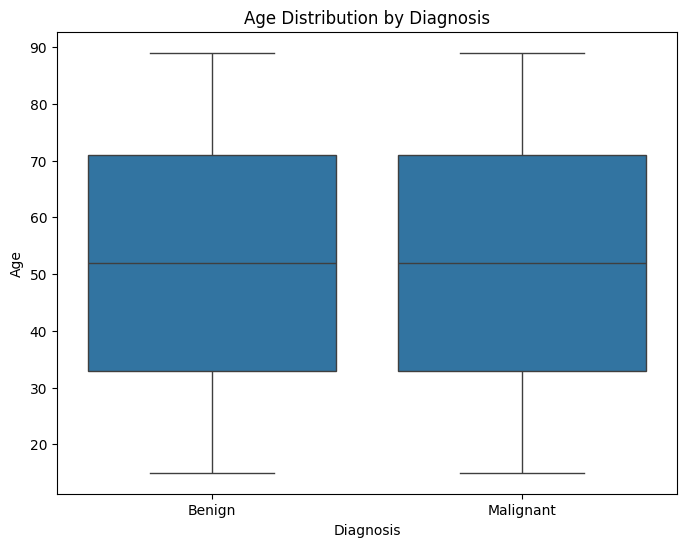

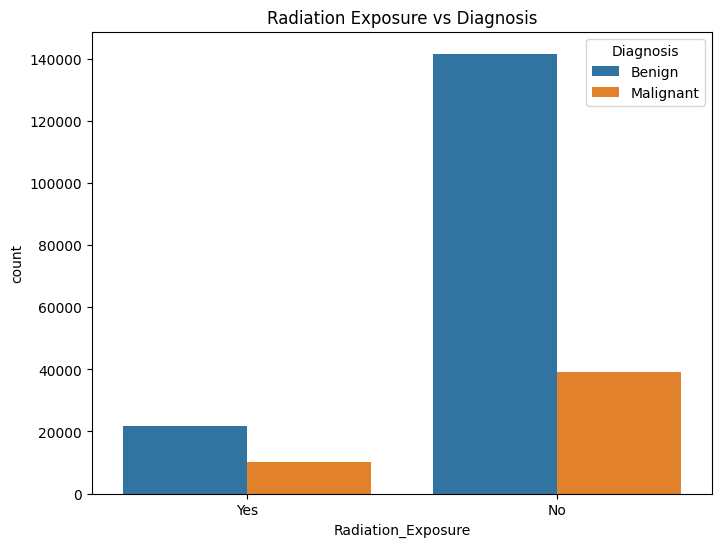

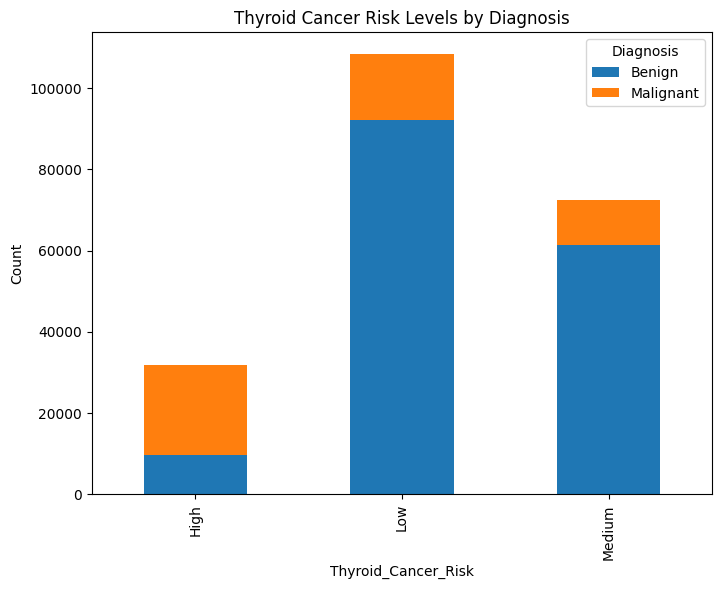

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical features (Age, TSH_Level, T3_Level, T4_Level, Nodule_Size)
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Boxplot: Age by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age Distribution by Diagnosis')
plt.show()

# Barplot: Radiation Exposure vs Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Radiation_Exposure', hue='Diagnosis', data=df)
plt.title('Radiation Exposure vs Diagnosis')
plt.show()

# Stacked Bar Plot: Risk Levels by Diagnosis
risk_by_diagnosis = df.groupby(['Thyroid_Cancer_Risk', 'Diagnosis']).size().unstack().fillna(0)
risk_by_diagnosis.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Thyroid Cancer Risk Levels by Diagnosis')
plt.ylabel('Count')
plt.show()


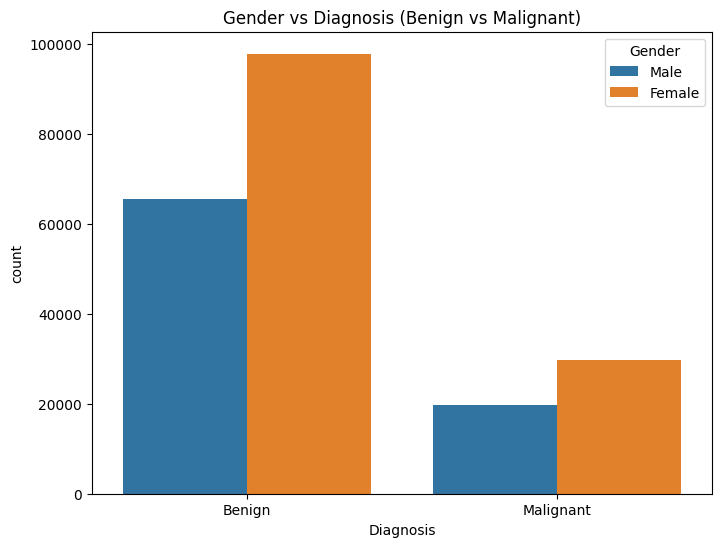

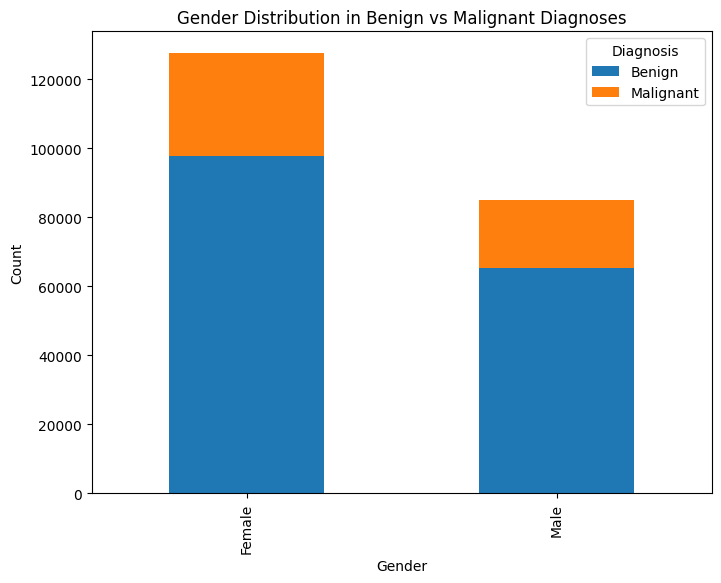

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Gender vs Diagnosis (Benign vs Malignant)
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', hue='Gender', data=df)
plt.title('Gender vs Diagnosis (Benign vs Malignant)')
plt.show()

# Stacked Bar Plot for Gender vs Diagnosis
gender_diagnosis = df.groupby(['Gender', 'Diagnosis']).size().unstack().fillna(0)
gender_diagnosis.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender Distribution in Benign vs Malignant Diagnoses')
plt.ylabel('Count')
plt.show()


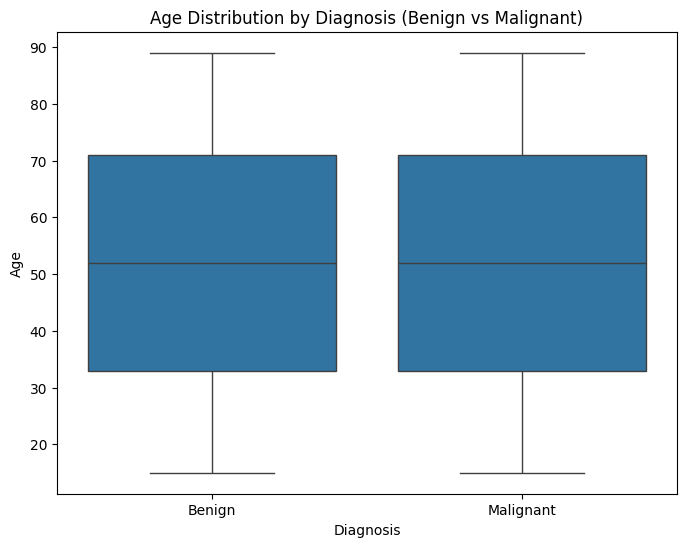

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age Distribution by Diagnosis (Benign vs Malignant)')
plt.show()

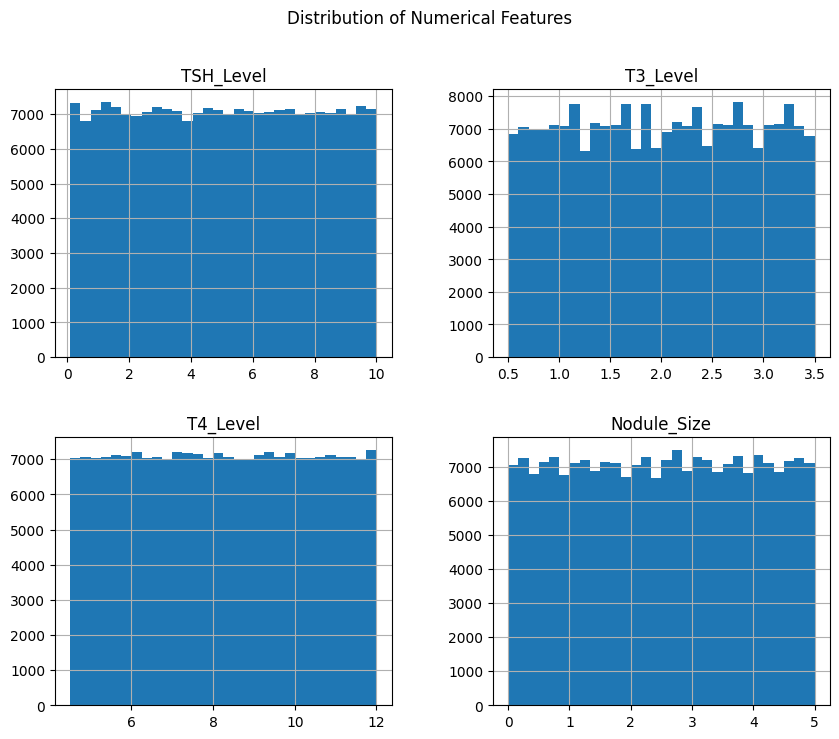

In [ ]:
h

In [ ]:

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()


In [ ]:
#pearson
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Patient_ID')

correlation_results = []

# Loop through all pairs of numerical columns
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):  #avoid duplicate pairs and self correlation
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]

        # Compute Pearson correlation and p-value
        corr, p_value = pearsonr(df[col1], df[col2])

        # Store the results
        correlation_results.append({"Feature 1": col1, "Feature 2": col2, "Correlation": corr, "P-Value": p_value})

# Convert results to DataFrame and display
correlation_df = pd.DataFrame(correlation_results)
correlation_df.head()


Feature 1           Feature 2  Correlation   P-Value
0       Age              Gender    -0.000151  0.944410
1       Age             Country    -0.001077  0.619343
2       Age           Ethnicity    -0.001762  0.416421
3       Age      Family_History     0.003337  0.123793
4       Age  Radiation_Exposure     0.004007  0.064639

In [ ]:

# Function to calculate Cramér's V for categorical variables

def calculate_cramers_v(feature_1, feature_2):
    contingency_table = pd.crosstab(feature_1, feature_2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()  # Total sample size
    k = min(contingency_table.shape) - 1  # Degrees of freedom adjustment
    v = np.sqrt(chi2 / (n * k))  # Cramér's V formula

    return v, p

# Compute Cramér's V for all categorical variable pairs
cramers_v_results = []

for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):  # Avoid duplicate pairs
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        # Calculate Cramér's V and p-value
        v, p_value = calculate_cramers_v(df[col1], df[col2])

        # Store the results
        cramers_v_results.append({"Feature 1": col1, "Feature 2": col2, "Cramér's V": v, "P-Value": p_value})

# Convert results to DataFrame and display
cramers_v_df = pd.DataFrame(cramers_v_results)
cramers_v_df.head()

Feature 1           Feature 2  Cramér's V   P-Value
0    Gender             Country    0.007508  0.213976
1    Gender           Ethnicity    0.003266  0.686529
2    Gender      Family_History    0.002110  0.330448
3    Gender  Radiation_Exposure    0.000635  0.769582
4    Gender   Iodine_Deficiency    0.002829  0.192005

In [ ]:
#point biserial
from scipy.stats import pointbiserialr

# Identify binary categorical columns (i.e., two unique values)
binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 2]

# Compute Point Biserial Correlation for binary categorical vs numerical features
point_biserial_results = []

for cat_col in binary_categorical_cols:
    for num_col in numerical_cols:
        corr, p_value = pointbiserialr(df[cat_col], df[num_col])

        # Store the results
        point_biserial_results.append({
            "Binary Categorical Feature": cat_col,
            "Numerical Feature": num_col,
            "Point Biserial Correlation": corr,
            "P-Value": p_value
        })

# Convert results to DataFrame and display
point_biserial_df = pd.DataFrame(point_biserial_results)
point_biserial_df.head()

Binary Categorical Feature Numerical Feature  Point Biserial Correlation  \
0                     Gender               Age                   -0.000151   
1                     Gender            Gender                    1.000000   
2                     Gender           Country                    0.002932   
3                     Gender         Ethnicity                    0.001389   
4                     Gender    Family_History                   -0.002121   

    P-Value  
0  0.944410  
1  0.000000  
2  0.176375  
3  0.521837  
4  0.328057

In [ ]:
#remove feature with low correlation with target
# remove two features that are highly correlated (multicollinearity)
# chi square cramer p<0.05

In [ ]:

nominal_vars = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Country', 'Ethnicity']
ordinal_vars = ['Thyroid_Cancer_Risk', 'Diagnosis']
# country and ethnicity

onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(df[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

In [ ]:
encoded_nominal_df

Gender_Female  Gender_Male  Family_History_No  Family_History_Yes  \
0                 0.0          1.0                1.0                 0.0   
1                 0.0          1.0                1.0                 0.0   
2                 0.0          1.0                1.0                 0.0   
3                 1.0          0.0                1.0                 0.0   
4                 1.0          0.0                0.0                 1.0   
...               ...          ...                ...                 ...   
212686            1.0          0.0                1.0                 0.0   
212687            0.0          1.0                1.0                 0.0   
212688            1.0          0.0                1.0                 0.0   
212689            1.0          0.0                1.0                 0.0   
212690            1.0          0.0                1.0                 0.0   

        Radiation_Exposure_No  Radiation_Exposure_Yes  Iodine_Deficiency_No  \
0                         0.0                     1.0                   1.0   
1                         0.0                     1.0                   1.0   
2                         1.0                     0.0                   1.0   
3                         1.0                     0.0                   1.0   
4                         0.0                     1.0                   1.0   
...                       ...                     ...                   ...   
212686                    1.0                     0.0                   1.0   
212687                    1.0                     0.0                   1.0   
212688                    1.0                     0.0                   1.0   
212689                    1.0                     0.0                   1.0   
212690                    1.0                     0.0                   1.0   

        Iodine_Deficiency_Yes  Smoking_No  Smoking_Yes  ...  Country_Nigeria  \
0                         0.0         1.0          0.0  ...              0.0   
1                         0.0         1.0          0.0  ...              0.0   
2                         0.0         1.0          0.0  ...              1.0   
3                         0.0         1.0          0.0  ...              0.0   
4                         0.0         1.0          0.0  ...              0.0   
...                       ...         ...          ...  ...              ...   
212686                    0.0         1.0          0.0  ...              0.0   
212687                    0.0         1.0          0.0  ...              0.0   
212688                    0.0         1.0          0.0  ...              1.0   
212689                    0.0         1.0          0.0  ...              0.0   
212690                    0.0         0.0          1.0  ...              0.0   

        Country_Russia  Country_South Korea  Country_UK  Country_USA  \
0                  1.0                  0.0         0.0          0.0   
1                  0.0                  0.0         0.0          0.0   
2                  0.0                  0.0         0.0          0.0   
3                  0.0                  0.0         0.0          0.0   
4                  0.0                  0.0         0.0          0.0   
...                ...                  ...         ...          ...   
212686             0.0                  0.0         0.0          0.0   
212687             0.0                  0.0         0.0          0.0   
212688             0.0                  0.0         0.0          0.0   
212689             0.0                  0.0         0.0          0.0   
212690             0.0                  0.0         0.0          0.0   

        Ethnicity_African  Ethnicity_Asian  Ethnicity_Caucasian  \
0                     0.0              0.0                  1.0   
1                     0.0              0.0                  0.0   
2                     0.0              0.0                  1.0   
3                     0.0              1

In [ ]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal_vars])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_vars)
encoded_ordinal_df

Thyroid_Cancer_Risk  Diagnosis
0                       1.0        0.0
1                       1.0        0.0
2                       1.0        0.0
3                       2.0        0.0
4                       0.0        0.0
...                     ...        ...
212686                  1.0        0.0
212687                  2.0        0.0
212688                  2.0        0.0
212689                  2.0        0.0
212690                  1.0        1.0

[212691 rows x 2 columns]

In [ ]:
encoded_ordinal_df['Diagnosis'].unique()

array([0., 1.])

In [ ]:
# scale numerical
numerical_features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

In [ ]:
# # mean 0 std 1
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])
# df.head()

In [ ]:
#drop original categorical cols.
df = df.drop(nominal_vars + ordinal_vars, axis=1)

In [ ]:
df.head()

Patient_ID  Age  TSH_Level  T3_Level  T4_Level  Nodule_Size
0           1   66       9.37      1.67      6.16         1.08
1           2   29       1.83      1.73     10.54         4.05
2           3   86       6.26      2.59     10.57         4.61
3           4   75       4.10      2.62     11.04         2.46
4           5   35       9.10      2.11     10.71         2.11

In [ ]:
#combine
df_final=pd.concat(
    [df, encoded_nominal_df, encoded_ordinal_df ], axis=1
)

In [ ]:
df_final.head()

Patient_ID  Age  TSH_Level  T3_Level  T4_Level  Nodule_Size  Gender_Female  \
0           1   66       9.37      1.67      6.16         1.08            0.0   
1           2   29       1.83      1.73     10.54         4.05            0.0   
2           3   86       6.26      2.59     10.57         4.61            0.0   
3           4   75       4.10      2.62     11.04         2.46            1.0   
4           5   35       9.10      2.11     10.71         2.11            1.0   

   Gender_Male  Family_History_No  Family_History_Yes  ...  \
0          1.0                1.0                 0.0  ...   
1          1.0                1.0                 0.0  ...   
2          1.0                1.0                 0.0  ...   
3          0.0                1.0                 0.0  ...   
4          0.0                0.0                 1.0  ...   

   Country_South Korea  Country_UK  Country_USA  Ethnicity_African  \
0                  0.0         0.0          0.0                0.0   
1                  0.0         0.0          0.0                0.0   
2                  0.0         0.0          0.0                0.0   
3                  0.0         0.0          0.0                0.0   
4                  0.0         0.0          0.0                1.0   

   Ethnicity_Asian  Ethnicity_Caucasian  Ethnicity_Hispanic  \
0              0.0                  1.0                 0.0   
1              0.0                  0.0                 1.0   
2              0.0                  1.0                 0.0   
3              1.0                  0.0                 0.0   
4              0.0                  0.0                 0.0   

   Ethnicity_Middle Eastern  Thyroid_Cancer_Risk  Diagnosis  
0                       0.0                  1.0        0.0  
1                       0.0                  1.0        0.0  
2                       0.0                  1.0        0.0  
3                       0.0                  2.0        0.0  
4                       0.0                  0.0        0.0  

[5 rows x 37 columns]

In [ ]:
df_final['Diagnosis'].unique()

array([0., 1.])

Lets classify

In [ ]:
#split
X = df_final.drop(columns=['Diagnosis'])
y = df_final['Diagnosis']

In [ ]:
y.unique()

array([0., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [ ]:

k_range = range(1, 31)
recalls = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    recall = recall_score(y_test, y_pred, pos_label=1)
    recalls.append(recall)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(k_range, recalls, marker='o')
plt.title('Recall (Malignant) vs K in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall (Malignant)')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
y.unique()


array([0., 1.])

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_proba = knn.predict_proba(X_test)[:, 1]

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # sensitivity
f1 = f1_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

In [ ]:
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

In [ ]:
type1_error = FP / (TN + FP)
type2_error = FN / (TP + FN)

In [ ]:
print('Evaluation Metrics:')
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall (Sensitivity): {}'.format(recall))
print('F1 Score: {}'.format(f1))

Evaluation Metrics:
Accuracy: 0.8010531512259339
Precision: 0.61604447974583
Recall (Sensitivity): 0.39076985086658605
F1 Score: 0.478204574881312


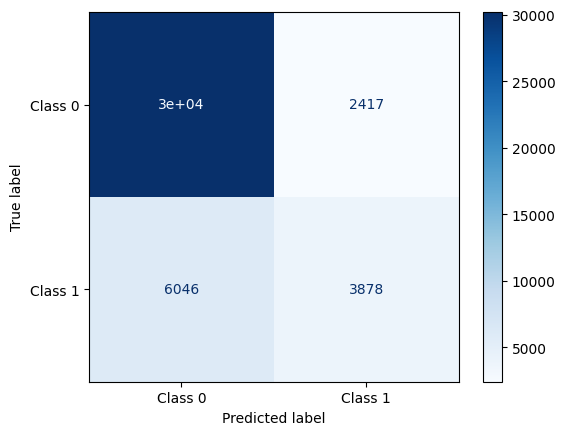

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print('Sensitivity (Recall): {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))
print('Type I Error (False Positive Rate): {}'.format(type1_error))
print('Type II Error (False Negative Rate): {}'.format(type2_error))

Sensitivity (Recall): 0.39076985086658605
Specificity: 0.9258929940211559
Type I Error (False Positive Rate): 0.07410700597884409
Type II Error (False Negative Rate): 0.609230149133414


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_value = roc_auc_score(y_test, y_proba)
print('AUC: {}'.format(auc_value))

AUC: 0.6827558384392857


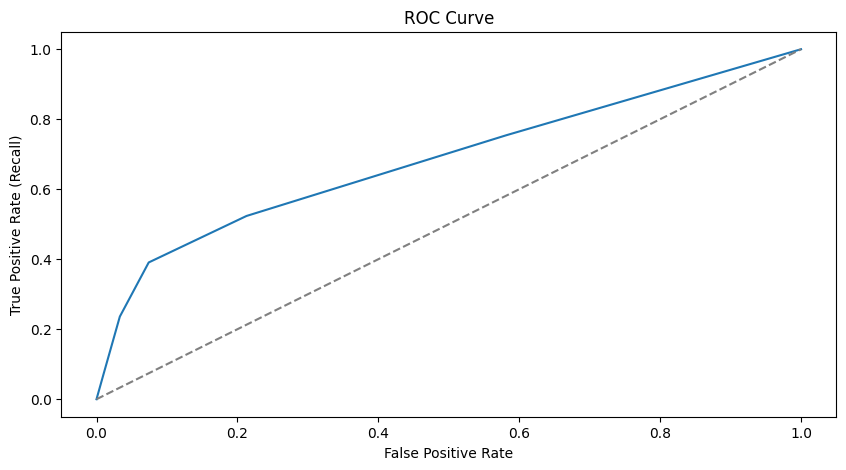

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

# **AHMED MEHAISI SECTION FEATURE SELECTION**

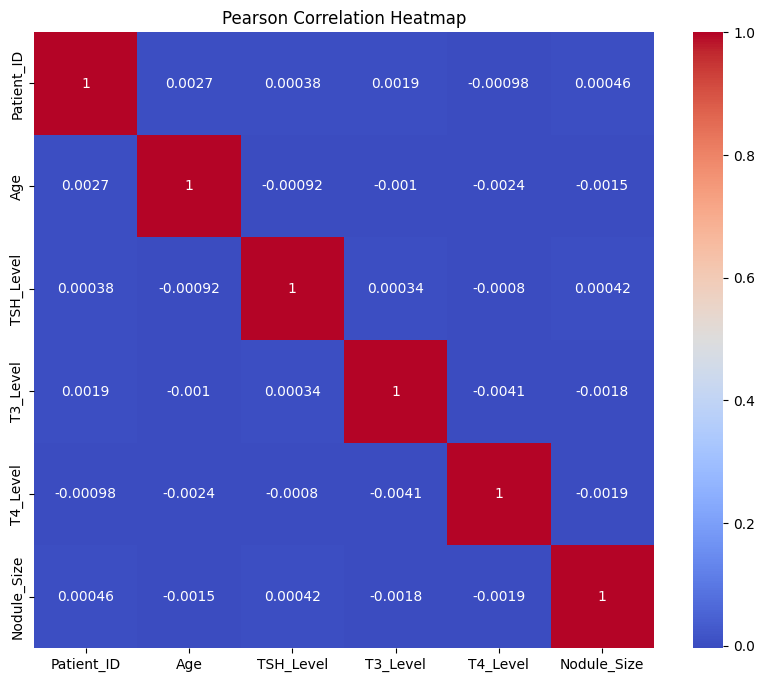

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Pearson Correlation Heatmap")
plt.show()


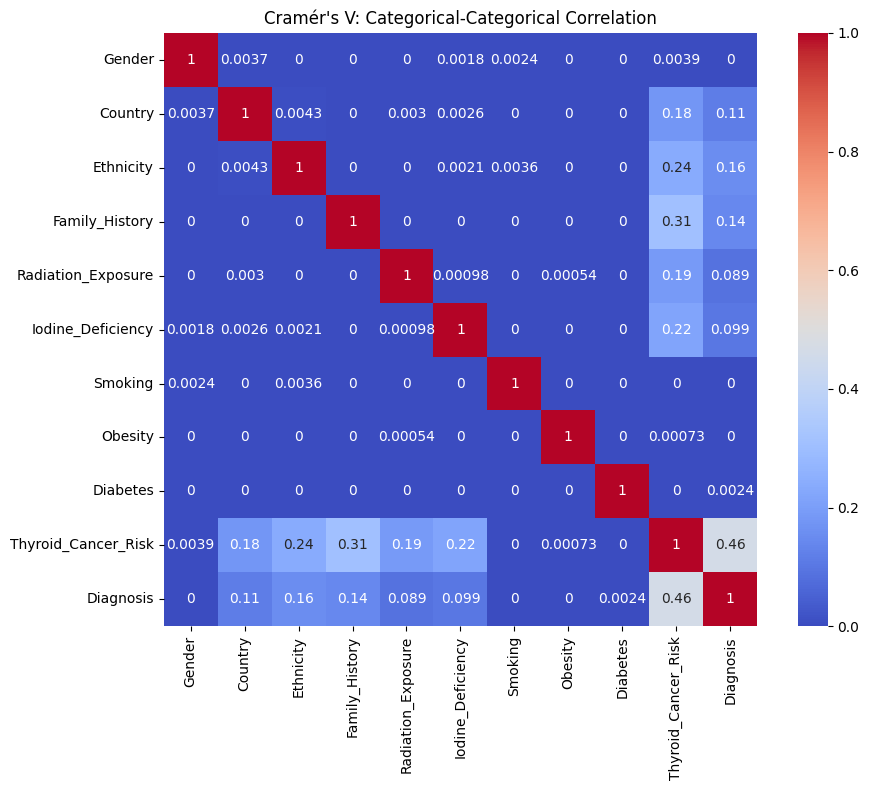

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create empty matrix
cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Fill matix
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            val = cramers_v(df[col1], df[col2])
            cramer_matrix.loc[col1, col2] = val

# Convert to float type
cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Cramér's V: Categorical-Categorical Correlation")
plt.tight_layout()
plt.show()



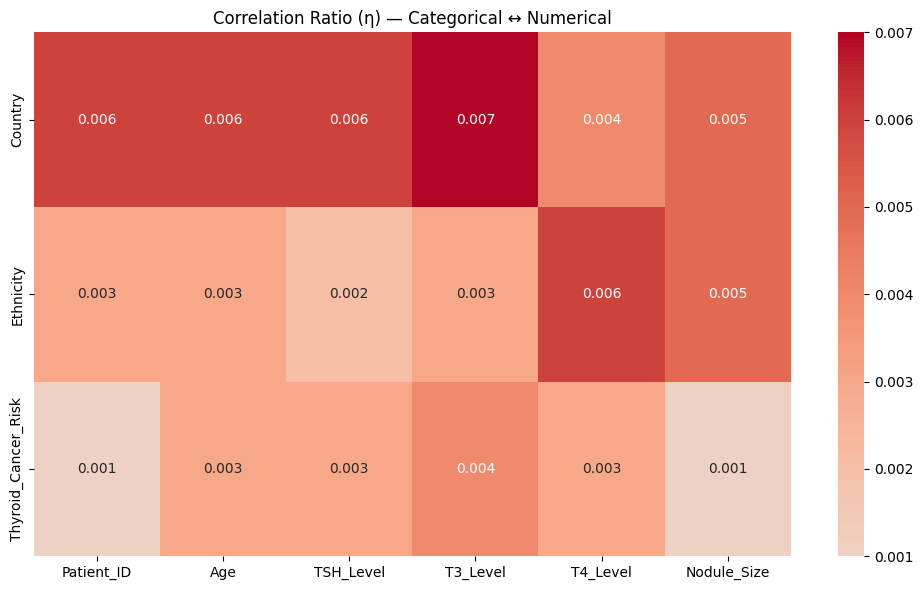

In [ ]:

def correlation_ratio(categories, values):
    # categories = categorical column
    # values = numerical column
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_values = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg)**2)
    denominator = np.sum((values - y_total_avg)**2)
    if denominator == 0:
        return 0.0
    else:
        return np.sqrt(numerator / denominator)
# Get multi-class categorical columns
multi_cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns
                  if df[col].nunique() > 2]

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr_ratio_results = pd.DataFrame(index=multi_cat_cols, columns=numeric_cols)

for cat_col in multi_cat_cols:
    for num_col in numeric_cols:
        try:
            ratio = correlation_ratio(df[cat_col], df[num_col])
            corr_ratio_results.loc[cat_col, num_col] = round(ratio, 3)
        except:
            corr_ratio_results.loc[cat_col, num_col] = np.nan

plt.figure(figsize=(10, 6))
sns.heatmap(corr_ratio_results.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Ratio (η) — Categorical ↔ Numerical")
plt.tight_layout()
plt.show()




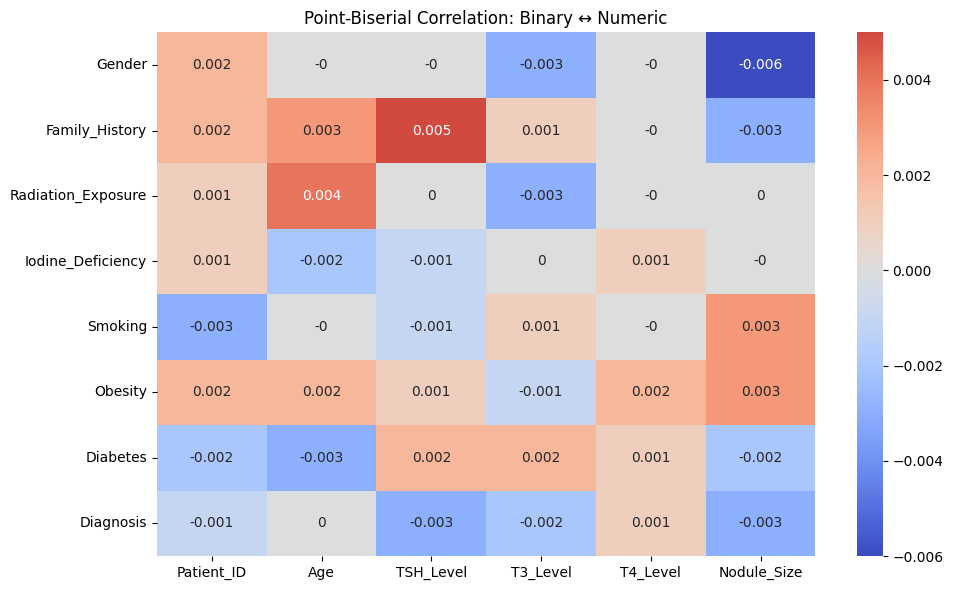

In [ ]:

# Step 1: Select binary categorical columns (e.g. gender, yes/no, etc.)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype in ['object', 'category', 'int64', 'bool']]

# Step 2: Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Step 3: Compute Point-Biserial correlation
pb_matrix = pd.DataFrame(index=binary_cols, columns=numeric_cols)

for bin_col in binary_cols:
    # Encode binary column if not already numeric
    if df[bin_col].dtype == 'object' or df[bin_col].dtype.name == 'category':
        bin_data = df[bin_col].astype('category').cat.codes
    else:
        bin_data = df[bin_col]

    for num_col in numeric_cols:
        try:
            r, _ = pointbiserialr(bin_data, df[num_col])
            pb_matrix.loc[bin_col, num_col] = round(r, 3)
        except:
            pb_matrix.loc[bin_col, num_col] = np.nan

plt.figure(figsize=(10, 6))
sns.heatmap(pb_matrix.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Point-Biserial Correlation: Binary ↔ Numeric")
plt.tight_layout()
plt.show()


# **AHMED MEHAISI SECTION KNN**

In [ ]:

nominal_vars = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Country', 'Ethnicity']
ordinal_vars = ['Thyroid_Cancer_Risk', 'Diagnosis']

onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(df[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

In [ ]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal_vars])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_vars)
encoded_ordinal_df

Thyroid_Cancer_Risk  Diagnosis
0                       1.0        0.0
1                       1.0        0.0
2                       1.0        0.0
3                       2.0        0.0
4                       0.0        0.0
...                     ...        ...
212686                  1.0        0.0
212687                  2.0        0.0
212688                  2.0        0.0
212689                  2.0        0.0
212690                  1.0        1.0

[212691 rows x 2 columns]

In [ ]:
# scale numerical
numerical_features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

In [ ]:
#drop original categorical cols.
df = df.drop(nominal_vars + ordinal_vars, axis=1)

In [ ]:
#combine
df_final=pd.concat(
    [df, encoded_nominal_df, encoded_ordinal_df ], axis=1
)

In [ ]:
#split
X = df_final.drop(columns=['Diagnosis'])
y = df_final['Diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [ ]:

k_range = [10, 12, 16, 20, 24, 28, 30, 32, 36, 40, 44, 48]
scores = []

max_f1 = 0
best_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    scores.append(f1)
    if f1 > max_f1:
        max_f1 = f1
        best_k = k

# Plotting
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.title('f1  vs K in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1 score')
plt.grid(True)
plt.show()
print(f"Best K: {best_k}, Best f1: {max_f1}")


KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=49, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # sensitivity
f1 = f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall (Sensitivity): {}'.format(recall))
print('F1 Score: {}'.format(f1))

Evaluation Metrics:
Accuracy: 0.8289804649850725
Precision: 0.7067444059249921
Recall (Sensitivity): 0.45307606828972624
F1 Score: 0.5521698984302862


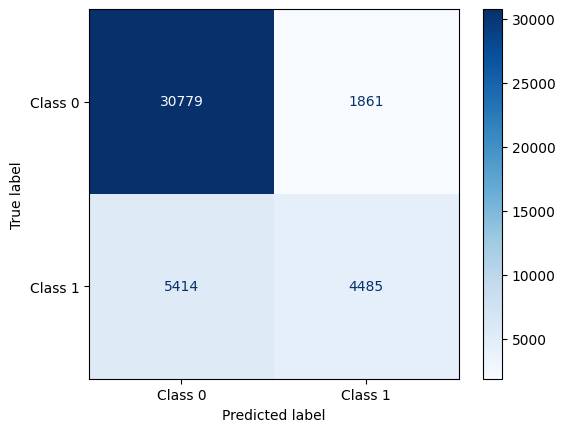

Sensitivity (Recall): 0.45307606828972624
Specificity: 0.942984068627451
Type I Error (False Positive Rate): 0.05701593137254902
Type II Error (False Negative Rate): 0.5469239317102738


In [ ]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

type1_error = FP / (TN + FP)
type2_error = FN / (TP + FN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Sensitivity (Recall): {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))
print('Type I Error (False Positive Rate): {}'.format(type1_error))
print('Type II Error (False Negative Rate): {}'.format(type2_error))

AUC: 0.7021326735816056


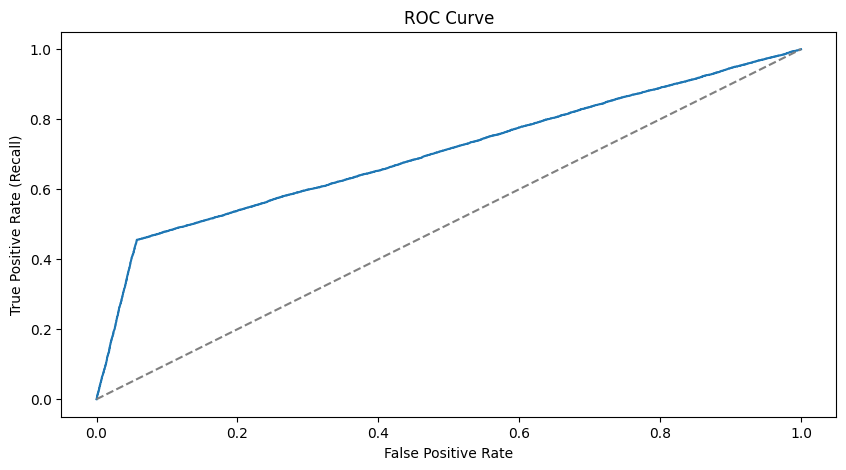

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_value = roc_auc_score(y_test, y_proba)
print('AUC: {}'.format(auc_value))

# Plot the ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

# **AHMED MEHAISI SECTION LOGISTIC REGRESSION**

In [ ]:

df = pd.read_csv("thyroid_cancer_risk_data.csv")

# Define categorical features
nominal_vars = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
                'Smoking', 'Obesity', 'Diabetes', 'Country', 'Ethnicity']

# Label encode only the target
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])  # Benign = 0, Malignant = 1

# Drop 'Thyroid_Cancer_Risk' completely
df = df.drop(columns=['Thyroid_Cancer_Risk'])

# One-hot encode nominal features
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(df[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

# Drop original nominal features
df = df.drop(columns=nominal_vars)

# Combine all features into one final DataFrame
df_final = pd.concat([df.reset_index(drop=True), encoded_nominal_df.reset_index(drop=True)], axis=1)

# Define X and y
X = df_final.drop(columns=['Diagnosis'])
y = df_final['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


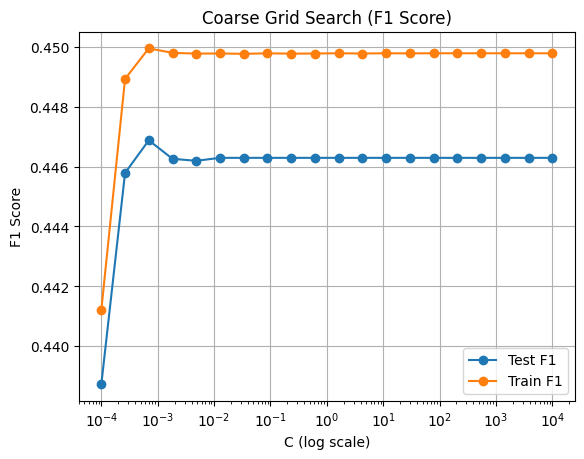

Best C: 0.0006951927961775605
Best test f1: 0.4469


In [ ]:
from sklearn.linear_model import LogisticRegression as LR_model

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Coarse grid (logarithmic scale)
Cs_coarse = np.logspace(-4, 4, num=20)  # 20 values from 10^-4 to 10^4
train_f1_scores = []
test_f1_scores = []

for C in Cs_coarse:
    model = LR_model(
        C=C,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000,
        random_state=0
    )
    model.fit(X_train, y_train)

    # Calculate F1 for train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train, y_train_pred))
    test_f1_scores.append(f1_score(y_test, y_test_pred))

# Plot results
plt.figure()
plt.semilogx(Cs_coarse, test_f1_scores, 'o-', label='Test F1')
plt.semilogx(Cs_coarse, train_f1_scores, 'o-', label='Train F1')
plt.xlabel('C (log scale)')
plt.ylabel('F1 Score')
plt.title('Coarse Grid Search (F1 Score)')
plt.legend()
plt.grid()
plt.show()

# Find the C value corresponding to maximum recall
best_idx = np.argmax(test_f1_scores)
best_C = Cs_coarse[best_idx]
best_f1 = test_f1_scores[best_idx]

print(f"Best C: {best_C}")
print(f"Best test f1: {best_f1:.4f}")

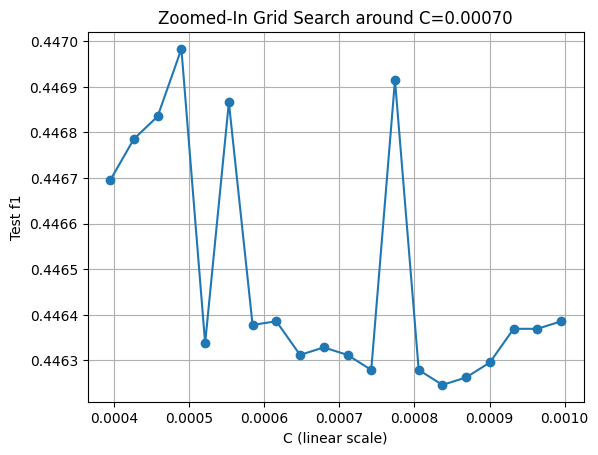

Best C: 0.0004899296382828237
Best test f1: 0.4470


In [ ]:
# 4) Fine‐grained “zoom” around your best C = 0.0048
best_C = 0.0006951927961775605
delta  = 0.0003
Cs_fine = np.linspace(best_C - delta, best_C + delta, 20)
test_f1_fine = []

for C in Cs_fine:
    model = LR_model(
        C=C,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000,
        random_state=0
    ).fit(X_train, y_train)

    test_f1_fine.append(
        f1_score(y_test, model.predict(X_test))
    )

# 5) Plot zoomed‐in grid
plt.figure()
plt.plot(Cs_fine, test_f1_fine, 'o-')
plt.xlabel('C (linear scale)')
plt.ylabel('Test f1')
plt.title('Zoomed‑In Grid Search around C=0.00070')
plt.grid(True)
plt.show()

# Find the C value corresponding to maximum recall
best_idx = np.argmax(test_f1_fine)
best_C = Cs_fine[best_idx]
best_f1 = test_f1_fine[best_idx]

print(f"Best C: {best_C}")
print(f"Best test f1: {best_f1:.4f}")


In [ ]:

for m in [1, 2, 3, 4 , 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]:
    mdl = LR_model(
        C = 0.0004583506909144026,
        class_weight='balanced',
        solver='lbfgs',
        max_iter=m,
        random_state=0
    ).fit(X_train, y_train)
    preds = mdl.predict(X_test)
    print(f"max_iter={m:>3} → f1={f1_score(y_test, preds):.4f}, used_iter={mdl.n_iter_[0]}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=  1 → f1=0.0000, used_iter=1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=  2 → f1=0.0000, used_iter=2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=  3 → f1=0.0002, used_iter=3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=  4 → f1=0.0006, used_iter=4


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter= 10 → f1=0.0372, used_iter=10


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter= 20 → f1=0.3441, used_iter=20


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter= 50 → f1=0.4226, used_iter=50


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=100 → f1=0.4216, used_iter=100


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=200 → f1=0.4459, used_iter=200


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=500 → f1=0.4461, used_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=1000 → f1=0.4473, used_iter=1000
max_iter=2000 → f1=0.4469, used_iter=1434
max_iter=5000 → f1=0.4469, used_iter=1434


In [ ]:
logistic_final = LR_model(
    C=0.0006951927961775605,
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=25,
    random_state=42
)
logistic_final.fit(X_train, y_train)


y_pred = logistic_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # sensitivity
f1 = f1_score(y_test, y_pred)
print('Evaluation Metrics:')
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall (Sensitivity): {}'.format(recall))
print('F1 Score: {}'.format(f1))

Evaluation Metrics:
Accuracy: 0.46244622581630973
Precision: 0.23768797373434397
Recall (Sensitivity): 0.5908907698508666
F1 Score: 0.33900852724382136


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#ABDELRAHMAN FETEHA SECTION

# Decission Trees

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,classification_report)


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


###Since I ran my code on a seperate collab workspace, I will be copy pasting this section from scratch ie pre processing and whatnot from 0.

In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('thyroid_cancer_risk_data.csv')
data.head()

Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1      1.73     10.54         4.05                 Low    Benign  
2      2.59     10.57         4.61                 Low    Benign  
3      2.62     11.04         2.46              Medium    Benign  
4      2.11     10.71         2.11                High    Benign

In [ ]:
data = data.drop('Patient_ID', axis=1)
features = ['Age', 'Gender', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
            'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
            'T3_Level', 'T4_Level', 'Nodule_Size']

In [ ]:
# 1. Standardize numerical features
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 2. Label Encode binary categorical features + ordinal
binary_cols = [
    'Gender', 'Family_History', 'Radiation_Exposure',
    'Iodine_Deficiency', 'Smoking', 'Obesity',
    'Diabetes', 'Diagnosis'  # Include target for now
]

# Encode ordinal column (Thyroid_Cancer_Risk)
# We assume Low < Medium < High
ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['Thyroid_Cancer_Risk'] = data['Thyroid_Cancer_Risk'].map(ordinal_map)

# Label encode binaries
le_dict = {}
for col in binary_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # Store encoder if needed later

# 3. One-hot encode Country and Ethnicity
data = pd.get_dummies(data, columns=['Country', 'Ethnicity'], drop_first=True)

# 4. Final separation into features (X) and labels (y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

#split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,stratify=y, test_size=0.2, random_state=42
)


##Part A: Decission Tree Model- Abdelrahman Feteha

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

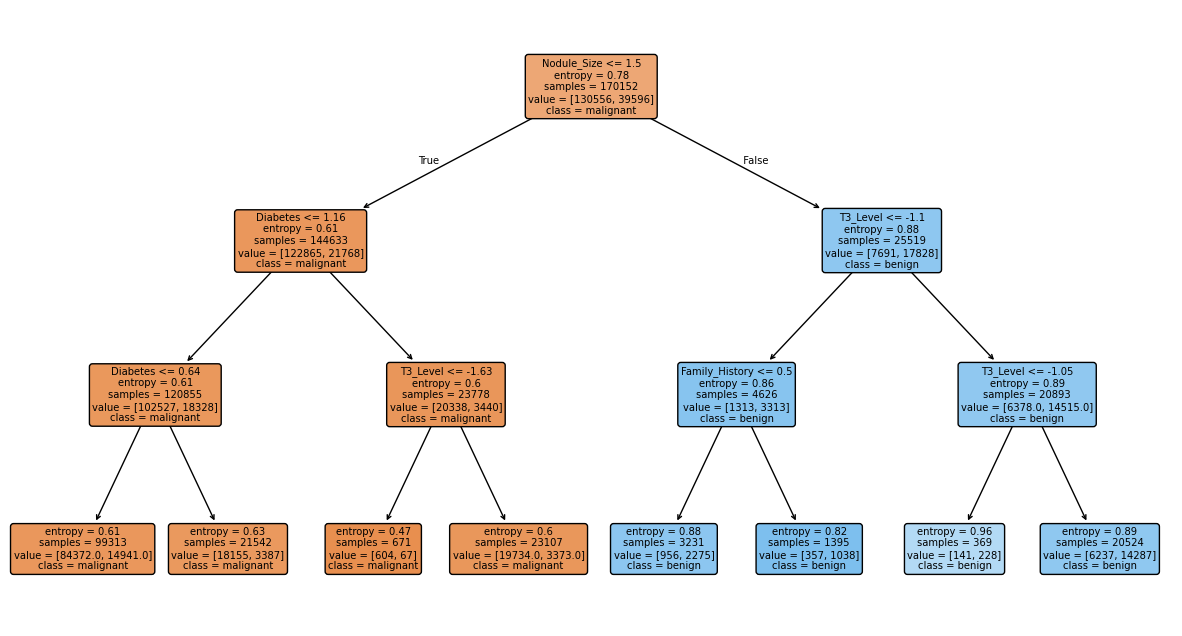

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(
    tree_model,
    rounded=True,
    precision=2,
    filled=True,
    feature_names= features,
    class_names=['malignant', 'benign']
)
plt.show()

In [ ]:
y_pred = tree_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.8293095747431769
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539



##Hyper Parameter Testing

In [ ]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2, 3, 5, 7, 10, 15]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='recall',  # prioritize malignant recall
    cv=5,
    n_jobs=-1  # faster with parallel processing
)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 3, 5, 7, 10, 15]},
             scoring='recall')

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("Classification Report for Best Estimator:\n")
print(classification_report(y_test, y_pred))

Classification Report for Best Estimator:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539



##Dealing with Data imbalance

In [ ]:
##option 1: Class Weights (best for Decision Tree)
tree_model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=42)

In [ ]:
y_pred = tree_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.8293095747431769
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539



In [ ]:
#Option 2: SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train_balanced, y_train_balanced)

y_pred = tree_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.8293095747431769
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539



In [ ]:
#option 3 balancing the Benign and Malignant cases by sampling
data = pd.read_csv('thyroid_cancer_risk_data.csv')

# Separate each class
malignant_data = data[data['Diagnosis'] == 'Malignant']
benign_data = data[data['Diagnosis'] == 'Benign']

# Find the smaller count
min_count = min(len(malignant_data), len(benign_data))

# Sample both classes to the same size
malignant_sample = malignant_data.sample(n=min_count, random_state=42)
benign_sample = benign_data.sample(n=min_count, random_state=42)

# Concatenate and shuffle the balanced data
balanced_data = pd.concat([malignant_sample, benign_sample]).sample(frac=1, random_state=42)

#do the preprocessing again:::::


# Reset index
data = balanced_data.reset_index(drop=True)


data = data.drop('Patient_ID', axis=1)
features = ['Age', 'Gender', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
            'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
            'T3_Level', 'T4_Level', 'Nodule_Size']

# 1. Standardize numerical features
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 2. Label Encode binary categorical features + ordinal
binary_cols = [
    'Gender', 'Family_History', 'Radiation_Exposure',
    'Iodine_Deficiency', 'Smoking', 'Obesity',
    'Diabetes', 'Diagnosis'  # Include target for now
]

# Encode ordinal column (Thyroid_Cancer_Risk)
# We assume Low < Medium < High
ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['Thyroid_Cancer_Risk'] = data['Thyroid_Cancer_Risk'].map(ordinal_map)

# Label encode binaries
le_dict = {}
for col in binary_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # Store encoder if needed later

# 3.  One-hot encode Country and Ethnicity
data = pd.get_dummies(data, columns=['Country', 'Ethnicity'], drop_first=True)

# 4. Final separation into features (X) and labels (y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

#split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,stratify=y, test_size=0.2, random_state=42
)

#try the decission tree
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.6982523487220932
              precision    recall  f1-score   support

           0       0.63      0.94      0.76      9899
           1       0.88      0.46      0.60      9899

    accuracy                           0.70     19798
   macro avg       0.76      0.70      0.68     19798
weighted avg       0.76      0.70      0.68     19798



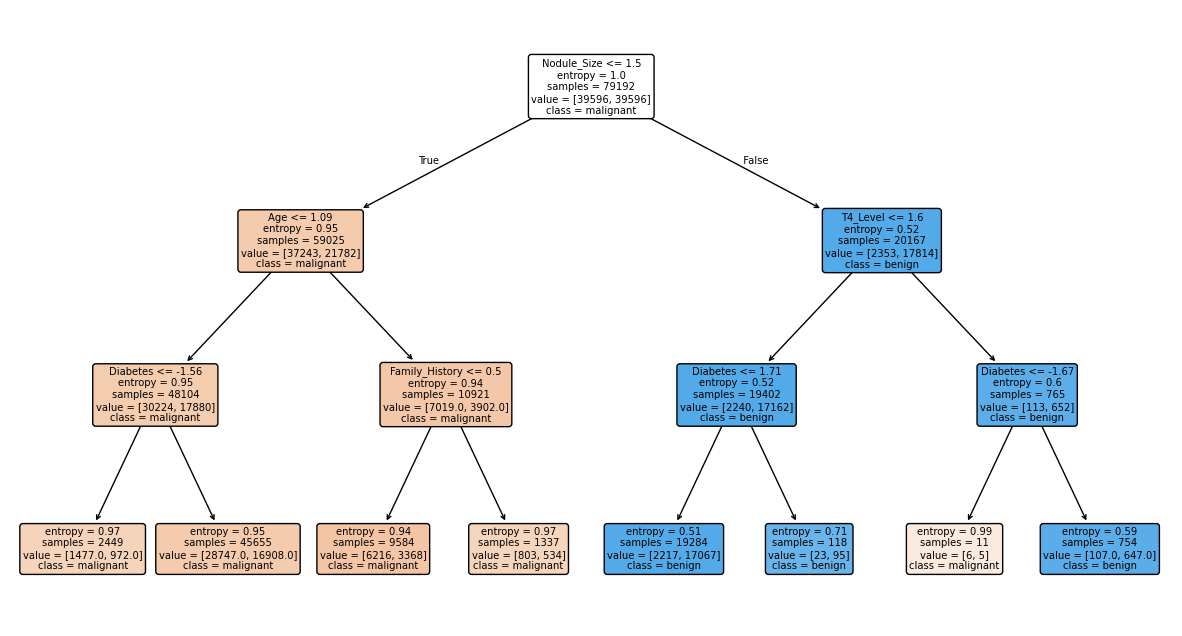

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(
    tree_model,
    rounded=True,
    precision=2,
    filled=True,
    feature_names= features,
    class_names=['malignant', 'benign']
)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2, 3, 5, 7, 10, 15]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='recall',  # prioritize malignant recall
    cv=5,
    n_jobs=-1  # faster with parallel processing
)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test)

# Results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.6805737953328619
              precision    recall  f1-score   support

           0       0.63      0.88      0.73      9899
           1       0.80      0.48      0.60      9899

    accuracy                           0.68     19798
   macro avg       0.72      0.68      0.67     19798
weighted avg       0.72      0.68      0.67     19798



##Testing how feature selection affects the model

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Values of k to test
for k in [2, 3, 5, 7]:
    print(f"\n### Using Top {k} Features ###")

    # Step 1: Feature Selection
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train, y_train)

    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))

    # Step 2: Retrain the best tree with selected features
    best_tree_k = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=grid_search.best_params_['max_depth'],
        class_weight='balanced',
        random_state=42
    )
    best_tree_k.fit(X_train_selected, y_train)

    # Step 3: Evaluate
    y_pred_k = best_tree_k.predict(X_test_selected)
    print(f"Accuracy (Top {k} features): {accuracy_score(y_test, y_pred_k):.4f}")
    print(classification_report(y_test, y_pred_k))


### Using Top 2 Features ###
Selected Features: ['Family_History', 'Thyroid_Cancer_Risk']
Accuracy (Top 2 features): 0.8293
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539


### Using Top 3 Features ###
Selected Features: ['Family_History', 'Thyroid_Cancer_Risk', 'Ethnicity_Asian']
Accuracy (Top 3 features): 0.8293
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.46      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.82     42539


### Using Top 5 Features ###
Selected Features: ['Family_History', 'Iodine_D

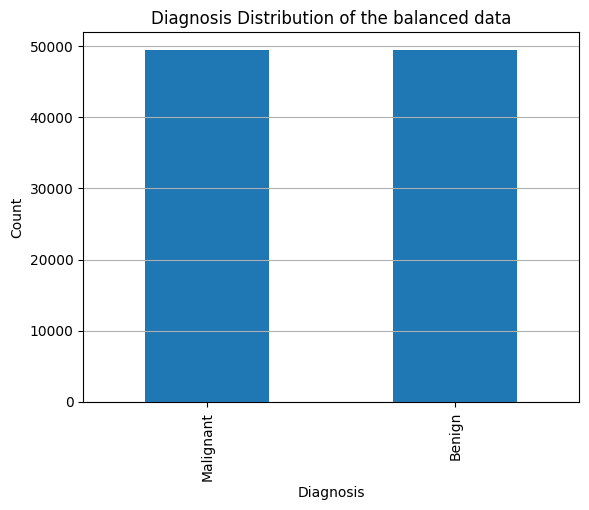

In [ ]:
balanced_data['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis Distribution of the balanced data')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


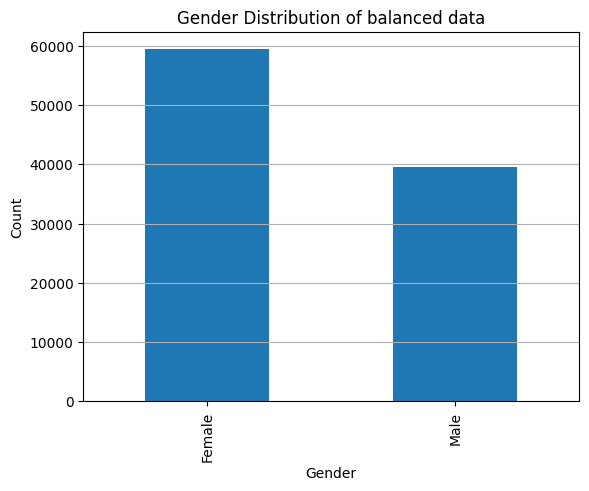

In [ ]:
balanced_data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of balanced data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


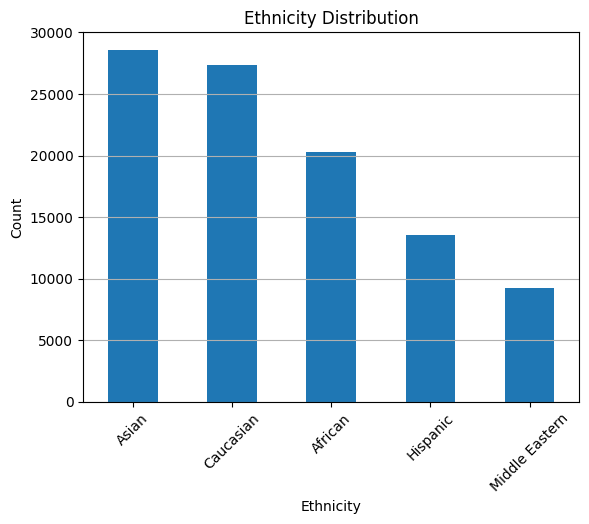

In [ ]:
balanced_data['Ethnicity'].value_counts().plot(kind='bar')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


#Part B: SVM

##SVM Uses distances and dot products between the dp, if i use label encoding, the model can assume the encoded integers have some order or distance between them for eg some ethnicities have larger distances thatn others which is wrong! so i must use one hot encoding for certain categories

In [ ]:
from sklearn.svm import SVC
# Scaling numerical features since unlike the decission tree, SVM requires this
#stratify=y keeps the class ratios balanced in train/test sets.

In [ ]:
print("### SVM Model Before Feature Selection ###\n")

# One model only
svm_model = SVC(kernel='linear', C=1.0, max_iter=10000, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

### SVM Model Before Feature Selection ###



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.30      0.34      9899
           1       0.42      0.50      0.46      9899

    accuracy                           0.40     19798
   macro avg       0.40      0.40      0.40     19798
weighted avg       0.40      0.40      0.40     19798

Accuracy: 0.4030



##Let's Try Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score


print ("Running Grid search for linear SVM")
# Custom scorer: recall for malignant cases (label = 1)
malignant_recall = make_scorer(recall_score, pos_label=1)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear']
}

grid_search = GridSearchCV(
    estimator=SVC(max_iter=10000, random_state=42),
    param_grid=param_grid,
    scoring=malignant_recall,
    cv=2,
    n_jobs=-1,
    verbose = 1
)

# Fit
grid_search.fit(X_train, y_train)

# Best model resultsv
print("Best Parameters:", grid_search.best_params_)
print("Best Recall (Malignant):", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

##This whole process took 15 mins


Running Grid search for linear SVM
Fitting 2 folds for each of 7 candidates, totalling 14 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Recall (Malignant): 0.7137337104758057

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.56      0.29      0.38      9899
           1       0.52      0.77      0.62      9899

    accuracy                           0.53     19798
   macro avg       0.54      0.53      0.50     19798
weighted avg       0.54      0.53      0.50     19798



In [ ]:
# Loop through all tested parameter combinations
results = grid_search.cv_results_

for i in range(len(results['params'])):
    print(f"Model {i+1}:")
    print(f"Parameters: {results['params'][i]}")
    print(f"Mean Recall (Malignant): {results['mean_test_score'][i]:.4f}")


Model 1:
Parameters: {'C': 0.001, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6983
Model 2:
Parameters: {'C': 0.01, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6815
Model 3:
Parameters: {'C': 0.1, 'kernel': 'linear'}
Mean Recall (Malignant): 0.7137
Model 4:
Parameters: {'C': 1, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6788
Model 5:
Parameters: {'C': 10, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6631
Model 6:
Parameters: {'C': 100, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6116
Model 7:
Parameters: {'C': 1000, 'kernel': 'linear'}
Mean Recall (Malignant): 0.6096


###Plotting the results

<ipython-input-11-e0a0a7cee26d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y='Mean Recall (Malignant)', data=df_rst, palette='viridis')


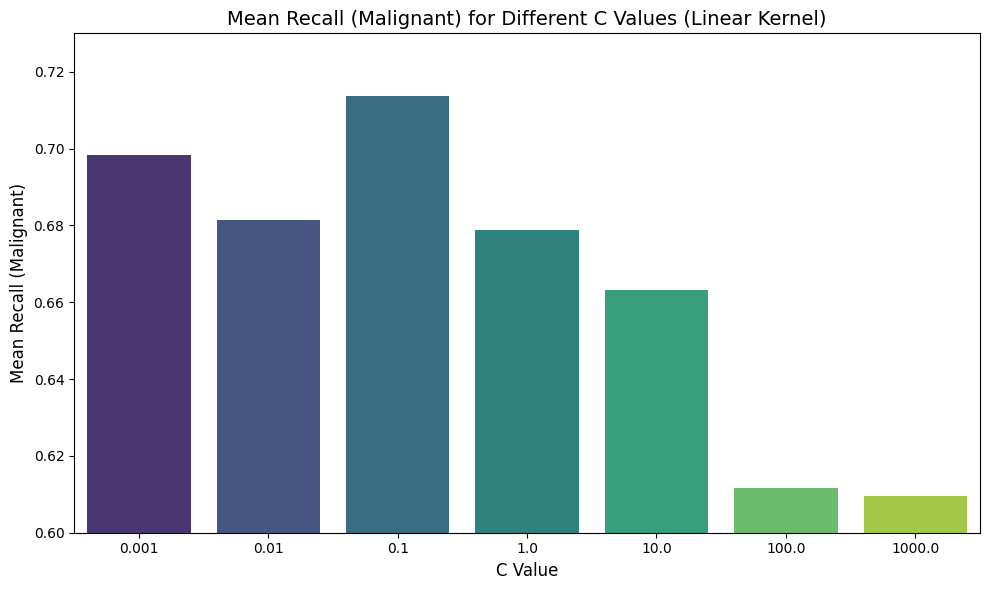

In [ ]:
data = {
    'Model': [1, 2, 3, 4, 5, 6, 7],
    'C Value': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'Mean Recall (Malignant)': [0.6983, 0.6815, 0.7137, 0.6788, 0.6631, 0.6116, 0.6096]
}

# Create DataFrame
df_rst = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='C Value', y='Mean Recall (Malignant)', data=df_rst, palette='viridis')

# Customize the plot
plt.title('Mean Recall (Malignant) for Different C Values (Linear Kernel)', fontsize=14)
plt.xlabel('C Value', fontsize=12)
plt.ylabel('Mean Recall (Malignant)', fontsize=12)
plt.ylim(0.6, 0.73)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Best model only
svm_model = SVC(kernel='linear', C=0.1, max_iter=10000, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.56      0.29      0.38      9899
           1       0.52      0.77      0.62      9899

    accuracy                           0.53     19798
   macro avg       0.54      0.53      0.50     19798
weighted avg       0.54      0.53      0.50     19798

Accuracy: 0.5311



In [ ]:
print("### SVM Model After Feature Selection ###\n")

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}\n")

svm_model = SVC(kernel='linear', C=0.1, random_state=42)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

### SVM Model After Feature Selection ###

Selected Features: ['Family_History', 'Thyroid_Cancer_Risk']

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      9899
           1       0.60      0.67      0.63      9899

    accuracy                           0.61     19798
   macro avg       0.61      0.61      0.61     19798
weighted avg       0.61      0.61      0.61     19798



##SVM (RBF)- ABDELRAHMAN FETEHA

###Due to the large size of our dataset, running the cell bellow took around 1 hour and still did not give a result, accordingly, we decided to decrease the amount of features and parameters used.

In [ ]:


# print("Running Grid search for RBF SVM")

# # Custom scorer: recall for malignant cases (label = 1)
# malignant_recall = make_scorer(recall_score, pos_label=1)

# # Define parameter grid for RBF kernel
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf']
# }

# grid_search_rbf = GridSearchCV(
#     estimator=SVC(max_iter=10000, random_state=42),
#     param_grid=param_grid,
#     scoring=malignant_recall,
#     cv=2,
#     n_jobs=-1,
#     verbose=2
# )

# # Fit
# grid_search_rbf.fit(X_train, y_train)

# # Best model results
# print("Best Parameters:", grid_search_rbf.best_params_)
# print("Best Recall (Malignant):", grid_search_rbf.best_score_)

# # Evaluate on test set|
# y_pred_rbf = grid_search_rbf.best_estimator_.predict(X_test)
# print("\nClassification Report (Test Data):")
# print(classification_report(y_test, y_pred_rbf))

In [ ]:
#this didnt converge either

# # Custom scorer: recall for malignant cases (label = 1)
# malignant_recall = make_scorer(recall_score, pos_label=1)

# # Define a SOFT, SMALL parameter grid
# param_grid = {
#     'C': [1, 10],            # Keep C small (1 and 10)
#     'gamma': [0.01, 0.1],     # Only two gamma values
#     'kernel': ['rbf']
# }

# # Set up the GridSearchCV
# grid_search_rbf = GridSearchCV(
#     estimator=SVC(max_iter=5000, tol=0.001, random_state=42),  # Fast convergence
#     param_grid=param_grid,
#     scoring=malignant_recall,
#     cv=2,              # still using 2-fold CV
#     n_jobs=-1,
#     verbose=2
# )

# # Fit the model
# grid_search_rbf.fit(X_train, y_train)

# # Best model results
# print("Best Parameters:", grid_search_rbf.best_params_)
# print("Best Recall (Malignant):", grid_search_rbf.best_score_)

# # Predict and evaluate on test set
# y_pred_rbf = grid_search_rbf.best_estimator_.predict(X_test)
# print("\nClassification Report (Test Data):")
# print(classification_report(y_test, y_pred_rbf))

Running Grid search for RBF SVM with 3 Features (fast version)
Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

In [ ]:

print("### SVM Model After using only 3 Features ###\n")

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}\n")

svm_model = SVC(kernel='rbf', C=0.1, random_state=42, max_iter=10000, gamma=2)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

### SVM Model After using only 3 Features ###

Selected Features: ['Family_History', 'Thyroid_Cancer_Risk', 'Ethnicity_Asian']



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.44      0.55     32640
           1       0.22      0.54      0.32      9899

    accuracy                           0.46     42539
   macro avg       0.49      0.49      0.44     42539
weighted avg       0.63      0.46      0.50     42539



In [ ]:
print("### SVM Model After using only 3 Features but gamma 1 ###\n")

print(f"Selected Features: {list(selected_features)}\n")

svm_model = SVC(kernel='rbf', C=0.1, random_state=42, max_iter=10000, gamma=1)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

### SVM Model After using only 3 Features but gamma 1 ###

Selected Features: ['Family_History', 'Thyroid_Cancer_Risk', 'Ethnicity_Asian']



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.70      0.51      0.59     32640
           1       0.15      0.28      0.19      9899

    accuracy                           0.46     42539
   macro avg       0.42      0.39      0.39     42539
weighted avg       0.57      0.46      0.50     42539



# Mohammad Navid Section

# XGBoost

# New Section

Explanation of the Code: Data Preprocessing:

The Patient_ID and Thyroid_Cancer_Risk columns are dropped to prevent leakage.

All categorical features are LabelEncoded to numeric values for use in the model.

Pure XGBoost (Overfitting):

The model is trained on the entire dataset (without train-test splitting) to evaluate its performance.

Classification report and confusion matrix are printed.

Feature Importance plot is generated to visualize which features were most important for the XGBoost model.

80-20 Train-Test Split:

The data is split into training and testing sets (80% for training and 20% for testing).

The model is then retrained on the training data and evaluated on the test data.

Classification report, confusion matrix, and confusion matrix heatmap are generated.

In [ ]:
# 1. Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and Preprocess the Dataset
df = pd.read_csv("Thyroid Cancer Risk Dataset.csv")

# Drop irrelevant columns (Patient_ID and Thyroid_Cancer_Risk to avoid leakage)
df = df.drop(columns=["Patient_ID", "Thyroid_Cancer_Risk"])

# Encode all categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Define Features and Target
X = df.drop(columns=["Diagnosis"])  # Features
y = df["Diagnosis"]  # Target

# 4. **Pure XGBoost** - Train on the entire dataset (overfitted)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)  # Train on all data

# 5. **Evaluate Pure XGBoost** on the same data
y_pred = model.predict(X)

# 6. Print Classification Report and Confusion Matrix for Pure XGBoost
print("Pure XGBoost Classification Report:")
print(classification_report(y, y_pred))

print("Pure XGBoost Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# 7. Plot Feature Importance for Pure XGBoost
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Top 10 Feature Importance in XGBoost (Pure Model)')
plt.show()

# 8. **80-20 Train-Test Split** - Split data for real-world evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Train XGBoost model on the training set
model.fit(X_train, y_train)

# 10. Evaluate XGBoost on the test set
y_pred_test = model.predict(X_test)

# 11. Print Classification Report and Confusion Matrix for 80-20 Test
print("XGBoost (80-20 Split) Classification Report:")
print(classification_report(y_test, y_pred_test))

print("XGBoost (80-20 Split) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# 12. Plot Confusion Matrix Heatmap for 80-20 Split
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix – XGBoost (80-20 Split)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


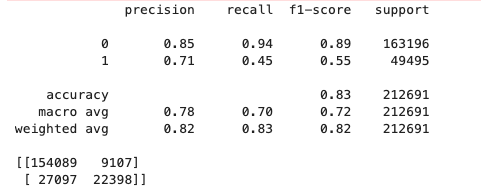

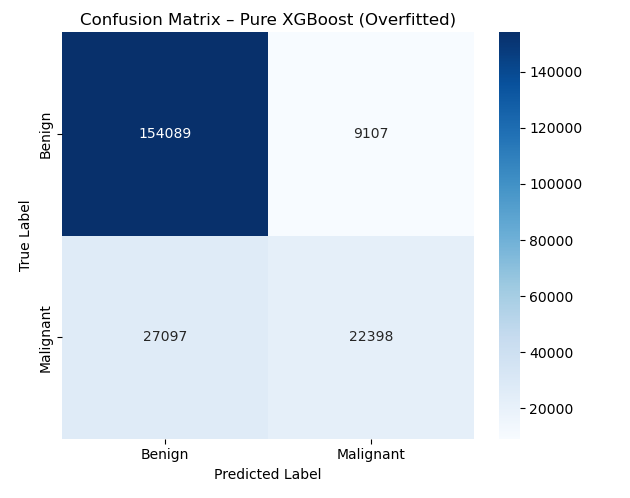

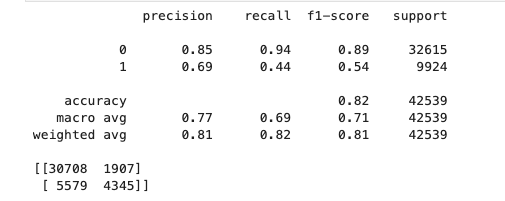

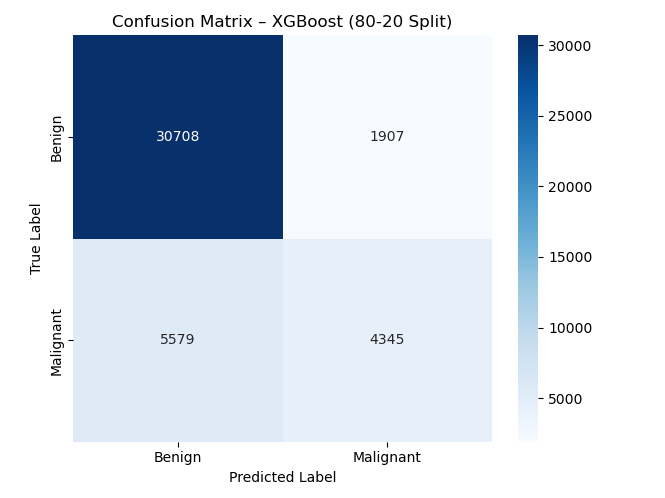

Tuning the Parameter

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset (Make sure the dataset is in the correct directory)
df = pd.read_csv("Thyroid Cancer Risk Dataset.csv")

# Drop unnecessary columns to avoid leakage
df = df.drop(columns=["Patient_ID", "Thyroid_Cancer_Risk"])

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]


FileNotFoundError: [Errno 2] No such file or directory: 'Thyroid Cancer Risk Dataset.csv'

# Naive Bayes

Explanation of the Code: Importing Libraries:

We use libraries like scikit-learn for machine learning tasks, pandas for data manipulation, and matplotlib/seaborn for visualization.

Data Preprocessing:

We drop unnecessary columns like Patient_ID and Thyroid_Cancer_Risk to avoid data leakage.

We encode categorical features to numeric values using LabelEncoder.

Train-Test Split:

The data is split into 80% training and 20% test using the train_test_split function.

Naive Bayes Model:

We initialize the Gaussian Naive Bayes model and fit it on the training data.

Prediction & Evaluation:

The model makes predictions on the test data, and we evaluate the model using the classification report and confusion matrix.

Confusion Matrix Heatmap:

We visualize the confusion matrix using seaborn to show the distribution of true positives, false positives, true negatives, and false negatives.

In [ ]:
# 1. Import Necessary Libraries
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical features
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

# 2. Load and Preprocess the Dataset
df = pd.read_csv("Thyroid Cancer Risk Dataset.csv")

# Drop irrelevant columns (Patient_ID and Thyroid_Cancer_Risk to avoid leakage)
df = df.drop(columns=["Patient_ID", "Thyroid_Cancer_Risk"])

# Encode all categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Define Features and Target
X = df.drop(columns=["Diagnosis"])  # Features (all columns except target)
y = df["Diagnosis"]  # Target (Diagnosis: Benign or Malignant)

# 4. Split the Data into Training and Testing Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize Naive Bayes Classifier
nb_model = GaussianNB()

# 6. Train the Naive Bayes Model on the 80% training data
nb_model.fit(X_train, y_train)

# 7. Make Predictions on the Test Data
y_pred_nb = nb_model.predict(X_test)

# 8. Evaluate Performance Using Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# 9. Print the Confusion Matrix
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# 10. Visualize the Confusion Matrix as a Heatmap
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix – Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


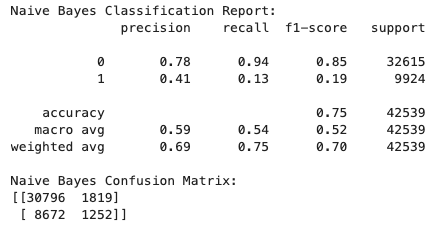


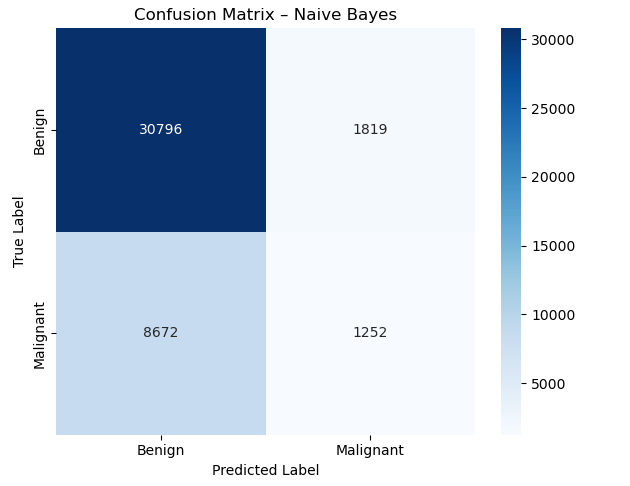

Tuning For the Naive Bayes model used in this task, we focused on tuning the var_smoothing parameter.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the dataset
df = pd.read_csv("Thyroid Cancer Risk Dataset.csv")

# Drop irrelevant columns (Patient_ID and Thyroid_Cancer_Risk to avoid leakage)
df = df.drop(columns=["Patient_ID", "Thyroid_Cancer_Risk"])

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["Diagnosis"])  # Features (all columns except target)
y = df["Diagnosis"]  # Target variable (Diagnosis: Benign or Malignant)


In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Range of smoothing parameters to test
}

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Set up GridSearchCV with 5-fold cross-validation
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb,
                              scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search_nb.fit(X_train, y_train)

# Get best parameters and best score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

# Print the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters for Naive Bayes:", best_params_nb)
print("Best Cross-Validation Accuracy for Naive Bayes:", best_score_nb)


In [ ]:
# Train the Naive Bayes model using the best parameters
best_nb_model = grid_search_nb.best_estimator_

# Make predictions on the test set
y_pred_nb = best_nb_model.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


In [ ]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix – Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


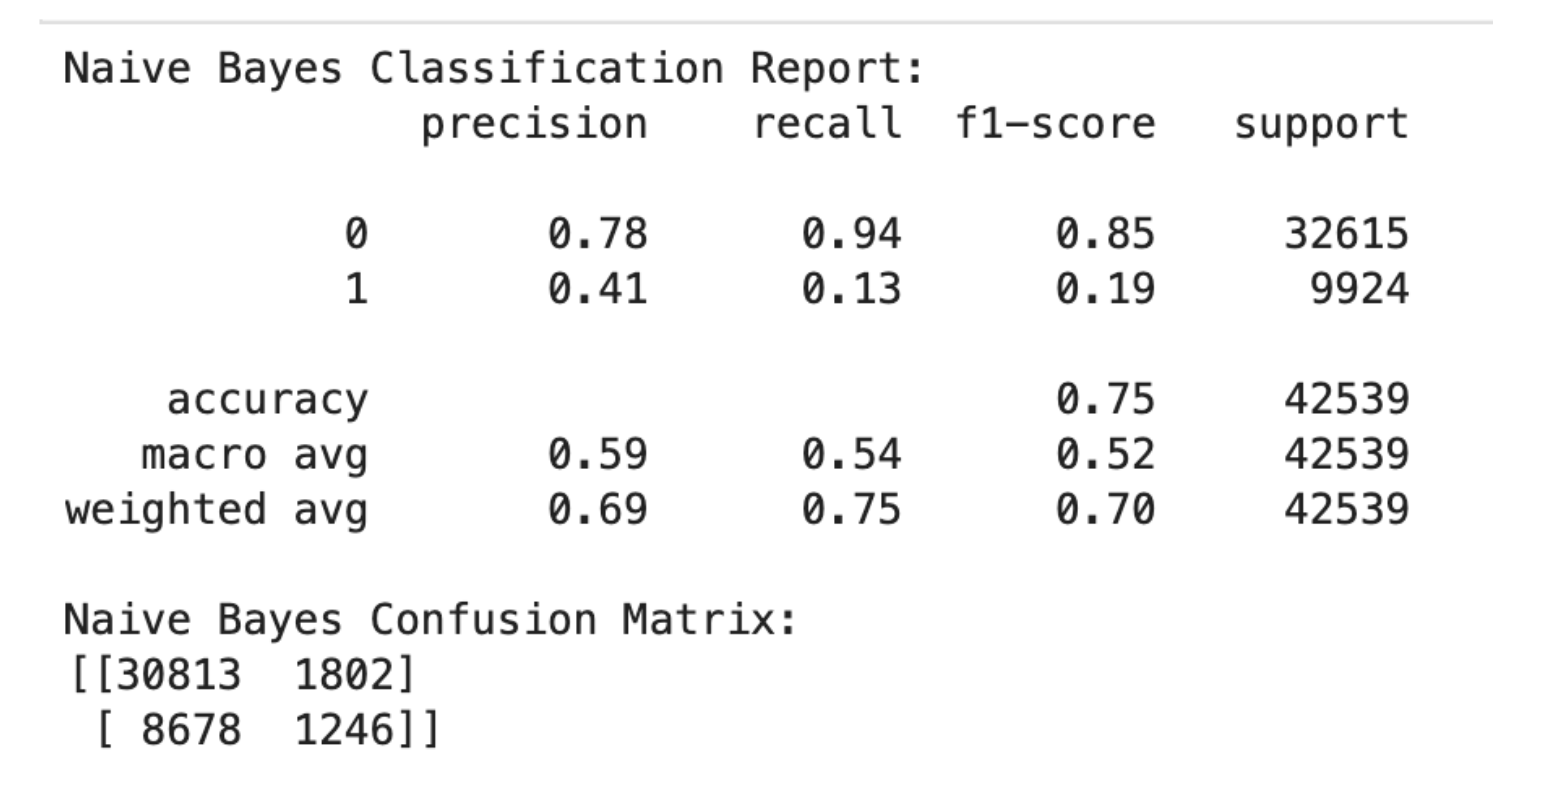

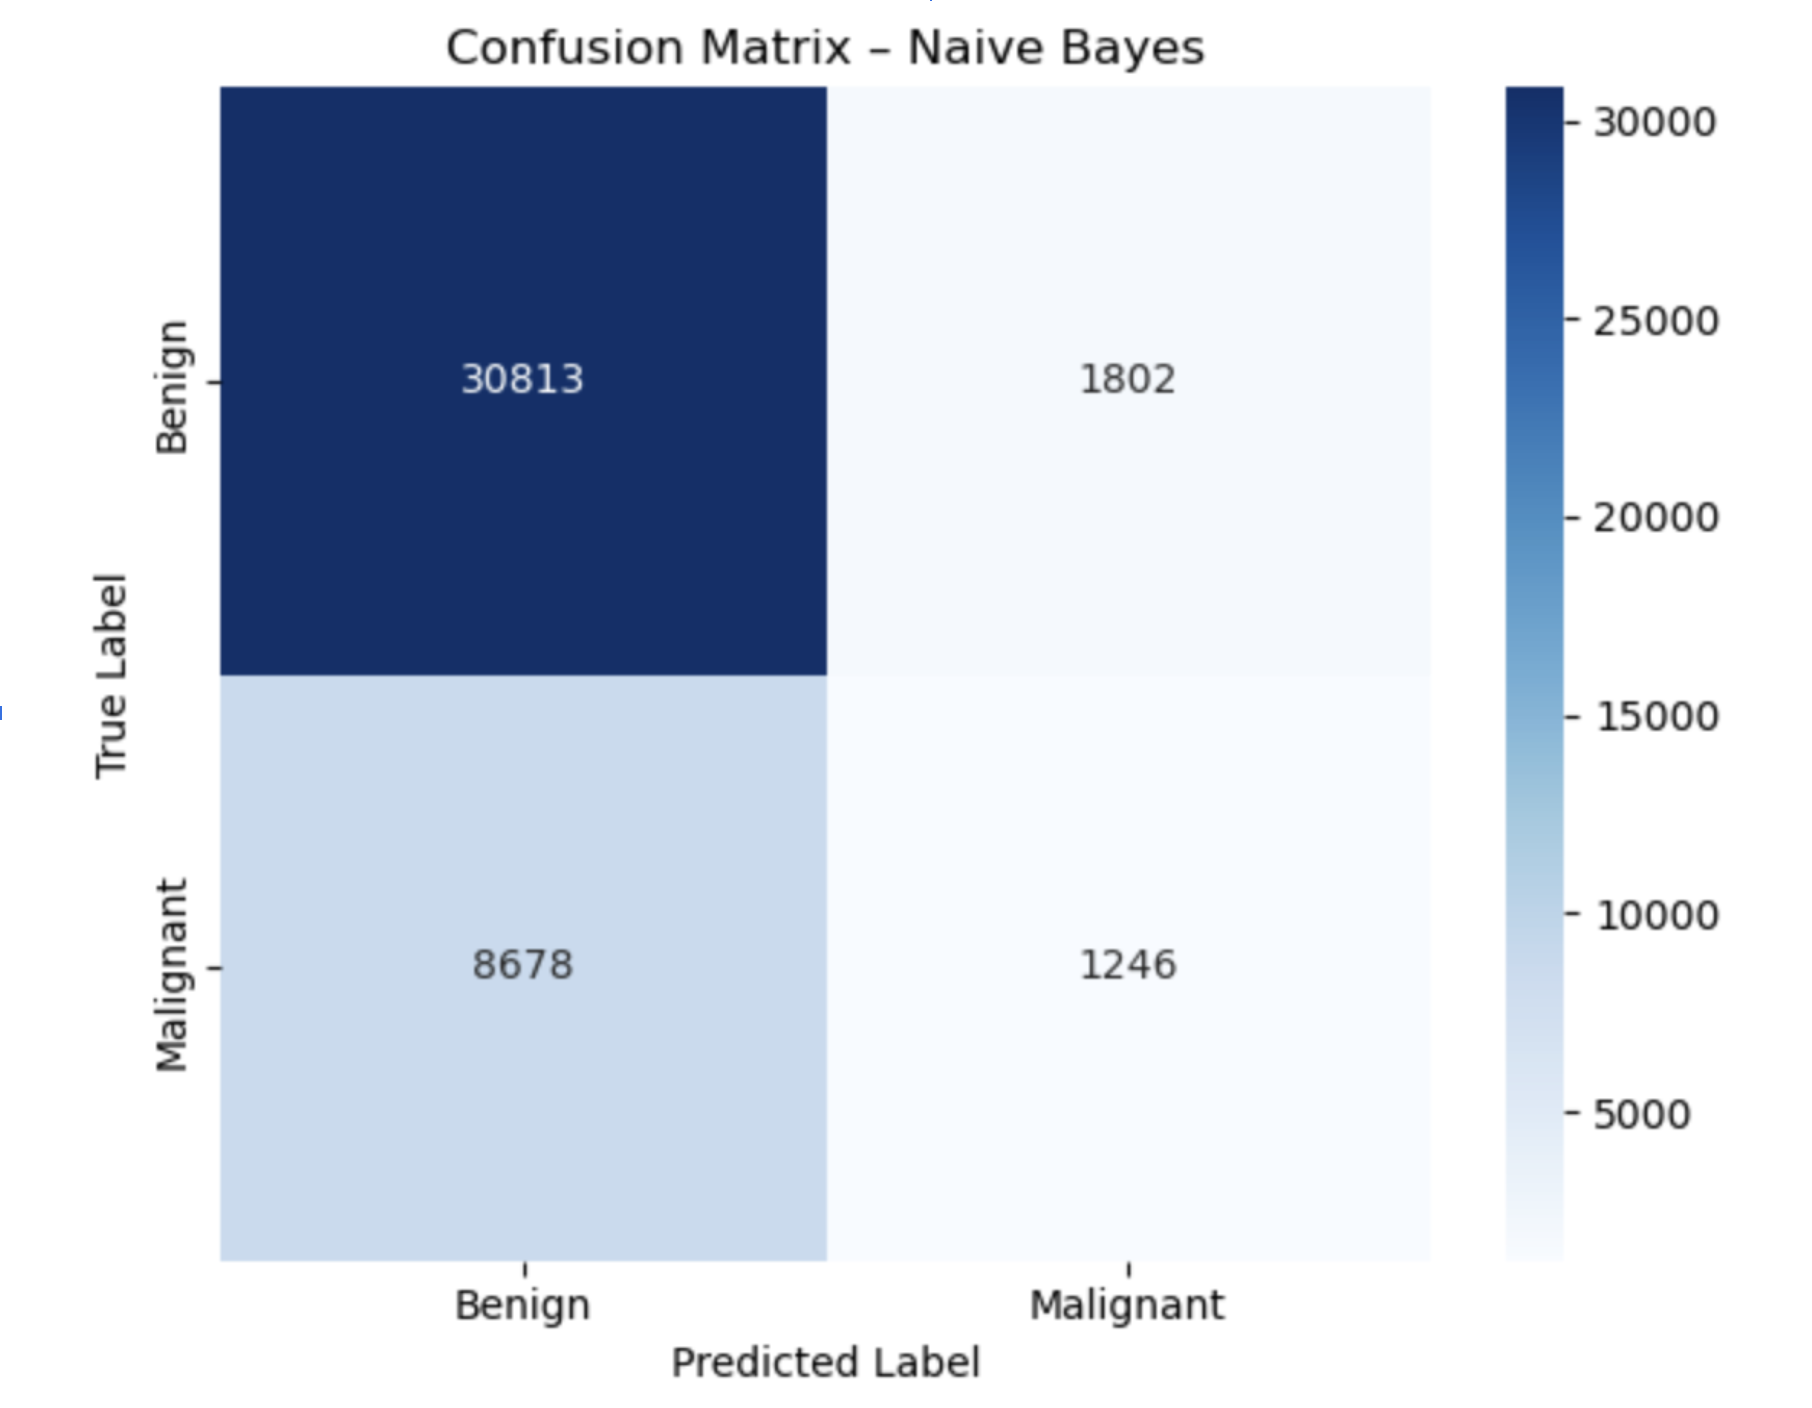